Import Library

In [1]:
# untuk meng impot libary yg ada di python
import matplotlib.pyplot as plt
%matplotlib inline

from skimage import data
from skimage.io import imread
from skimage.color import rgb2gray 
import numpy as np

Load & Plot Input Image

Shape citra 1 :  (1280, 720, 3)
Shape citra 2 :  (824, 800, 3)


Text(0.5, 1.0, 'Citra 2')

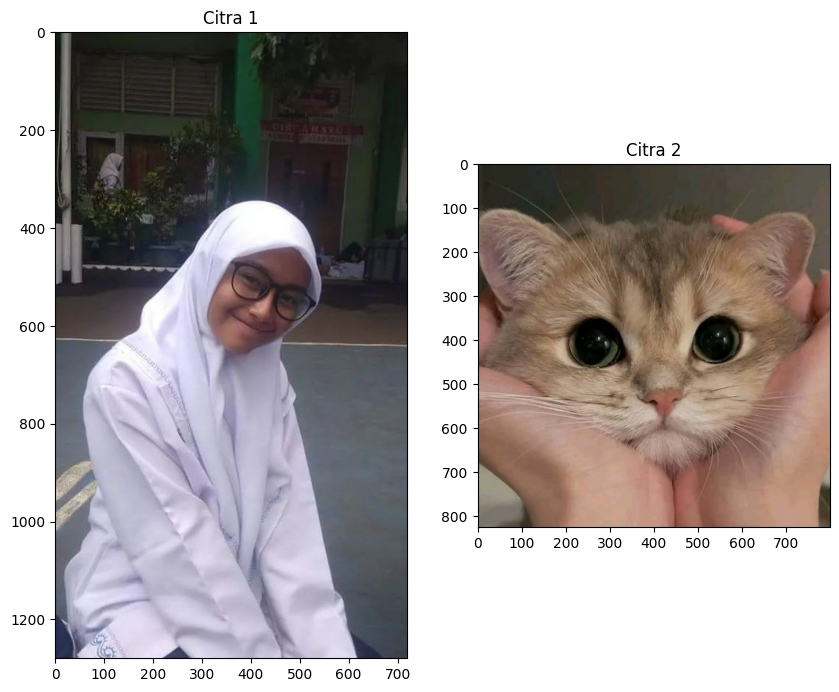

In [3]:
# untuk membaca citra menggunakan imread
citra1 = imread(fname="1.jpg")
citra2 = imread(fname="2.jpeg")

# menampilkan dimensi citra
print('Shape citra 1 : ', citra1.shape)
print('Shape citra 2 : ', citra2.shape)

# menampilkan citra 1 dan 2 menggunakan subplot
fig, axes = plt.subplots(1, 2, figsize=(10, 10))
ax = axes.ravel()

ax[0].imshow(citra1, cmap = 'gray') # menampilkan citra 1 dalam skala gray
ax[0].set_title("Citra 1") # untuk menampilkan title
ax[1].imshow(citra2, cmap = 'gray') # menampilkan citra 2 dalam skala gray
ax[1].set_title("Citra 2") # untuk menampilkan title

Code Asal Matlab

In [4]:
#for baris=2 : tinggi-1
#    for kolom=2 : lebar-1
#        minPiksel = min([F(baris-1, kolom-1) F(baris-1, kolom) F(baris, kolom+1) ...
#            F(baris, kolom-1) F(baris, kolom+1) F(baris+1, kolom-1)  ...
#            F(baris+1, kolom) F(baris+1, kolom+1)]);
#        
#        maksPiksel = max([F(baris-1, kolom-1) F(baris-1, kolom) F(baris, kolom+1)    ...
#            F(baris, kolom-1) F(baris, kolom+1) F(baris+1, kolom-1)  ...
#            F(baris+1, kolom) F(baris+1, kolom+1)]);    
#            
#        if F(baris, kolom) < minPiksel
#           G(baris, kolom) = minPiksel;
#        else
#            if F(baris, kolom) > maksPiksel
#                G(baris, kolom) = maksPiksel;
#            else
#                G(baris, kolom) = F(baris, kolom);
#            end
#        end    
#    end
#end

Menyiapkan variable output

In [5]:
# untuk mengcopy citra 1 dan 2 dengan tipe data float
copyCitra1 = citra1.copy().astype(float)
copyCitra2 = citra2.copy().astype(float)

# untuk mendapatkan dimensi citra 1 dan menginisialisasi output 1
m1,n1 = copyCitra1.shape[:2]
output1 = np.empty([m1, n1])

#  untuk mendapatkan dimensi citra 1 dan menginisialisasi output 1
m2,n2 = copyCitra2.shape[:2]
output2 = np.empty([m2, n2])

# menampilkan dimensi copycitra1 dan output1
print('Shape copy citra 1 : ', copyCitra1.shape)
print('Shape output citra 1 : ', output1.shape)
print('m1 : ',m1)
print('n1 : ',n1)
print()

# menampilkan dimensi copycitra2 dan output2
print('Shape copy citra 2 : ', copyCitra2.shape)
print('Shape output citra 3 : ', output2.shape)
print('m2 : ',m2)
print('n2 : ',n2)
print()


Shape copy citra 1 :  (1280, 720, 3)
Shape output citra 1 :  (1280, 720)
m1 :  1280
n1 :  720

Shape copy citra 2 :  (824, 800, 3)
Shape output citra 3 :  (824, 800)
m2 :  824
n2 :  800



Proses Filter Batas Pada Citra Input 1

In [6]:
# menginisialisasi output1 dengan matriks nol berukuran (m1, n1) dan tipe data float64
output1 = np.zeros((m1, n1), dtype=np.float64)


# melakukan looping untuk setiap posisi baris dan kolom pada citra 1
for baris in range(0, m1-1):
    for kolom in range(0, n1-1):
        a1 = baris
        b1 = kolom
         # menghitung jumlah dari nilai piksel sekitar (9 piksel) pada citra 1
        jumlah = np.sum([
            copyCitra1[a1-1, b1-1], copyCitra1[a1-1, b1], copyCitra1[a1-1, b1+1],
            copyCitra1[a1, b1-1], copyCitra1[a1, b1], copyCitra1[a1, b1+1],
            copyCitra1[a1+1, b1-1], copyCitra1[a1+1, b1], copyCitra1[a1+1, b1+1]
        ])
        # Menghitung nilai rata-rata dari piksel dan menyimpannya pada output1
        output1[a1, b1] = (1/9) * jumlah

Proses Filter Batas Pada Citra Input 2

In [7]:
# menginisialisasi output2 dengan matriks nol berukuran (m2, n2) dan tipe data float64
output2 = np.zeros((m2, n2), dtype=np.float64)

# melakukan looping untuk setiap posisi baris dan kolom pada citra 2
for baris1 in range(0, m2-1):
    for kolom1 in range(0, n2-1):
        a1 = baris1
        b1 = kolom1
        # menghitung jumlah dari nilai piksel sekitar (9 piksel) pada citra 2
        jumlah = np.sum([
            copyCitra2[a1-1, b1-1], copyCitra2[a1-1, b1], copyCitra2[a1-1, b1+1],
            copyCitra2[a1, b1-1], copyCitra2[a1, b1], copyCitra2[a1, b1+1],
            copyCitra2[a1+1, b1-1], copyCitra2[a1+1, b1], copyCitra2[a1+1, b1+1]
        ])
        # Menghitung nilai rata-rata dari piksel dan menyimpannya pada output2
        output2[a1, b1] = (1/9) * jumlah

Plot Citra Input dan Output Hasil dari Filter Batas

Text(0.5, 1.0, 'Output Citra 2')

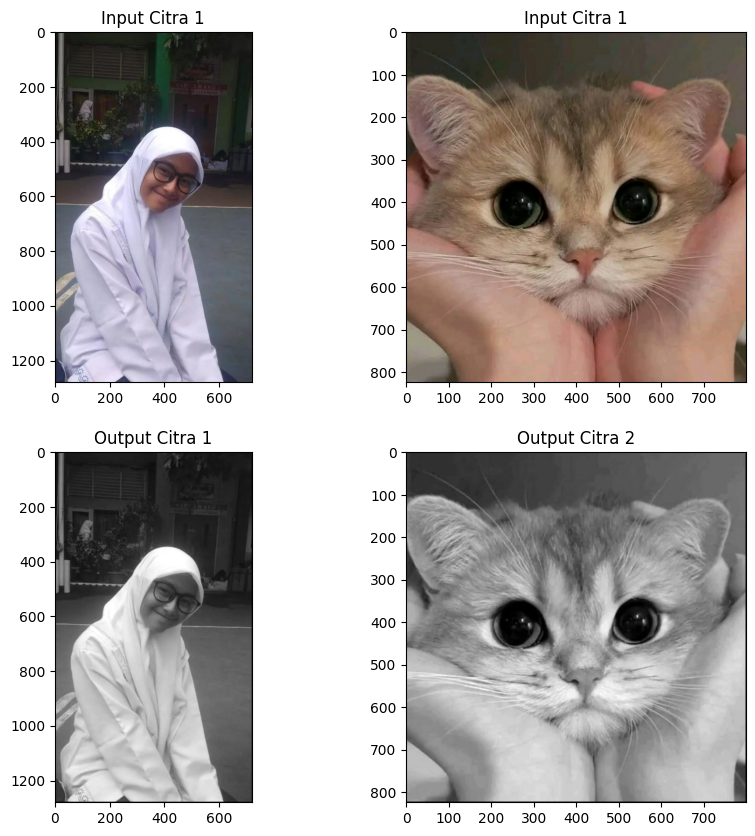

In [8]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10)) # membuat sebuah figure dengan ukuran 10x10 dan ukuran axes 2x2
ax = axes.ravel()# untuk mengubah array multidimensi menjadi array satu dimensi

# menampilkan input citra 1
ax[0].imshow(citra1, cmap = 'gray')
ax[0].set_title("Input Citra 1")

# menampilkan input citra 2
ax[1].imshow(citra2, cmap = 'gray')
ax[1].set_title("Input Citra 1")

# menampillkan output citra 1
ax[2].imshow(output1, cmap = 'gray')
ax[2].set_title("Output Citra 1")

# menampilkan output citra 2
ax[3].imshow(output2, cmap = 'gray')
ax[3].set_title("Output Citra 2")